In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
df=pd.read_csv("Sample.csv",encoding='utf-8')
df.head()

,Time,L2P6(W),Smoothing(a=0.3),Moving average
0,1,316.6,316.6000,316.6
1,2,292.8,316.6000,292.8
2,3,297.5,309.4600,297.5
3,4,245.3,305.8720,245.3
4,5,256.4,287.7004,261.2


In [3]:
x=[df['Time'][i] for i in df.index]
y_active=[df['L2P6(W)'][i] for i in df.index]
y_smooth=[df['Smoothing(a=0.3)'][i] for i in df.index]
y_moving=[df['Moving average'][i] for i in df.index]
y_L = []
y_S = []
y_M = []
for i in df.index:
    y__ = []
    y__.append(y_active[i])
    for j in range(len(y__)):
        y_L.append(y__)
for i in df.index:
    y__ = []
    y__.append(y_smooth[i])
    for j in range(len(y__)):
        y_S.append(y__)        
for i in df.index:
    y__ = []
    y__.append(y_moving[i])
    for j in range(len(y__)):
        y_M.append(y__)        

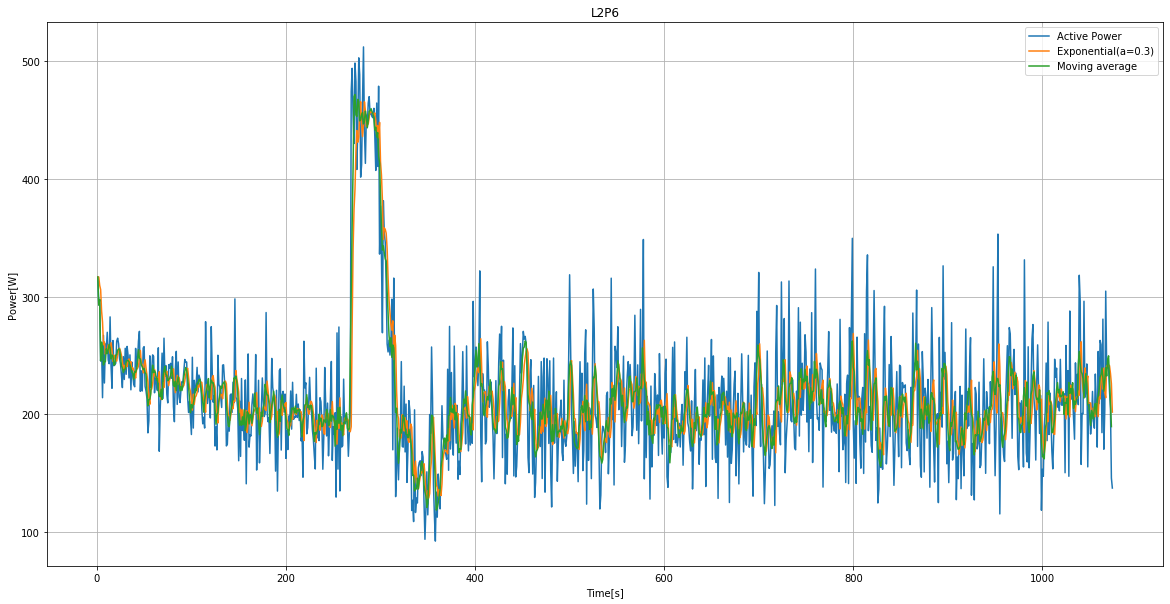

In [16]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(x,y_L)
plt.plot(x,y_S)
plt.plot(x,y_M)
plt.title("L2P6")
plt.ylabel('Power[W]')
plt.xlabel('Time[s]')
plt.legend(['Active Power','Exponential(a=0.3)','Moving average'], loc='upper right')
plt.show()

In [17]:
def create_dataset_L(y_L, look_back=1):
    dataX, dataY = [], []
    for i in range(len(y_L)-look_back):
        dataX.append(y_L[i:(i+look_back), 0])
        dataY.append(y_L[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
def create_dataset_S(y_S, look_back=1):
    dataX, dataY = [], []
    for i in range(len(y_S)-look_back):
        dataX.append(y_S[i:(i+look_back), 0])
        dataY.append(y_S[i + look_back, 0])
    return np.array(dataX), np.array(dataY)
def create_dataset_M(y_M, look_back=1):
    dataX, dataY = [], []
    for i in range(len(y_M)-look_back):
        dataX.append(y_M[i:(i+look_back), 0])
        dataY.append(y_M[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
look_back = 40

scaler = MinMaxScaler(feature_range=(0,1))
y_L = scaler.fit_transform(y_L)
y_S = scaler.fit_transform(y_S)
y_M = scaler.fit_transform(y_M)

train_data_L = y_L[0:600]
val_data_L = y_L[600:850]
test_data_L = y_L[850:]

train_data_S = y_S[0:600]
val_data_S = y_S[600:850]
test_data_S = y_S[850:]

train_data_M = y_M[0:600]
val_data_M = y_M[600:850]
test_data_M = y_M[850:]

x_train_L, y_train_L = create_dataset_L(train_data_L, look_back)
x_val_L, y_val_L = create_dataset_L(val_data_L, look_back)
x_test_L, y_test_L = create_dataset_L(test_data_L, look_back)

x_train_S, y_train_S = create_dataset_S(train_data_S, look_back)
x_val_S, y_val_S = create_dataset_S(val_data_S, look_back)
x_test_S, y_test_S = create_dataset_S(test_data_S, look_back)

x_train_M, y_train_M = create_dataset_M(train_data_M, look_back)
x_val_M, y_val_M = create_dataset_M(val_data_M, look_back)
x_test_M, y_test_M = create_dataset_M(test_data_M, look_back)

In [20]:
x_train_L = np.reshape(x_train_L, (x_train_L.shape[0], x_train_L.shape[1],1))
x_val_L = np.reshape(x_val_L, (x_val_L.shape[0], x_val_L.shape[1],1))
x_test_L = np.reshape(x_test_L, (x_test_L.shape[0], x_test_L.shape[1], 1))

x_train_S = np.reshape(x_train_S, (x_train_S.shape[0], x_train_S.shape[1],1))
x_val_S = np.reshape(x_val_S, (x_val_S.shape[0], x_val_S.shape[1],1))
x_test_S = np.reshape(x_test_S, (x_test_S.shape[0], x_test_S.shape[1], 1))

x_train_M = np.reshape(x_train_M, (x_train_M.shape[0], x_train_M.shape[1],1))
x_val_M = np.reshape(x_val_M, (x_val_M.shape[0], x_val_M.shape[1],1))
x_test_M = np.reshape(x_test_M, (x_test_M.shape[0], x_test_M.shape[1], 1))

In [25]:
model_L = Sequential()
model_L.add(LSTM(32, input_shape=(None, 1)))
model_L.add(Dropout(0.3))
model_L.add(Dense(1))

model_L.compile(loss='mean_squared_error', optimizer='adam')

hist_L = model_L.fit(x_train_L, y_train_L, epochs=200, batch_size=32, validation_data=(x_val_L, y_val_L))

Train on 560 samples, validate on 210 samples
Epoch 1/200
560/560 [==============================] - 3s 6ms/sample - loss: 0.1172 - val_loss: 0.0127
Epoch 2/200
560/560 [==============================] - 0s 796us/sample - loss: 0.0273 - val_loss: 0.0112
Epoch 3/200
560/560 [==============================] - 0s 785us/sample - loss: 0.0219 - val_loss: 0.0112
Epoch 4/200
560/560 [==============================] - 0s 810us/sample - loss: 0.0180 - val_loss: 0.0114
Epoch 5/200
560/560 [==============================] - 0s 816us/sample - loss: 0.0189 - val_loss: 0.0114
Epoch 6/200
560/560 [==============================] - 0s 807us/sample - loss: 0.0159 - val_loss: 0.0115
Epoch 7/200
560/560 [==============================] - 0s 776us/sample - loss: 0.0156 - val_loss: 0.0116
Epoch 8/200
560/560 [==============================] - 0s 787us/sample - loss: 0.0147 - val_loss: 0.0117
Epoch 9/200
560/560 [==============================] - 0s 817us/sample - loss: 0.0138 - val_loss: 0.0117
Epoch 10/20

Epoch 78/200
560/560 [==============================] - 0s 782us/sample - loss: 0.0107 - val_loss: 0.0121
Epoch 79/200
560/560 [==============================] - 0s 782us/sample - loss: 0.0103 - val_loss: 0.0122
Epoch 80/200
560/560 [==============================] - 0s 789us/sample - loss: 0.0109 - val_loss: 0.0122
Epoch 81/200
560/560 [==============================] - 0s 794us/sample - loss: 0.0112 - val_loss: 0.0121
Epoch 82/200
560/560 [==============================] - 0s 793us/sample - loss: 0.0104 - val_loss: 0.0121
Epoch 83/200
560/560 [==============================] - 0s 796us/sample - loss: 0.0106 - val_loss: 0.0121
Epoch 84/200
560/560 [==============================] - 0s 810us/sample - loss: 0.0109 - val_loss: 0.0122
Epoch 85/200
560/560 [==============================] - ETA: 0s - loss: 0.011 - 0s 823us/sample - loss: 0.0105 - val_loss: 0.0121
Epoch 86/200
560/560 [==============================] - 0s 823us/sample - loss: 0.0108 - val_loss: 0.0125
Epoch 87/200
560/560 [

560/560 [==============================] - 0s 812us/sample - loss: 0.0103 - val_loss: 0.0121
Epoch 155/200
560/560 [==============================] - 0s 800us/sample - loss: 0.0099 - val_loss: 0.0122
Epoch 156/200
560/560 [==============================] - 0s 789us/sample - loss: 0.0103 - val_loss: 0.0122
Epoch 157/200
560/560 [==============================] - 0s 794us/sample - loss: 0.0098 - val_loss: 0.0122
Epoch 158/200
560/560 [==============================] - 0s 773us/sample - loss: 0.0100 - val_loss: 0.0122
Epoch 159/200
560/560 [==============================] - 0s 800us/sample - loss: 0.0107 - val_loss: 0.0122
Epoch 160/200
560/560 [==============================] - 0s 819us/sample - loss: 0.0103 - val_loss: 0.0122
Epoch 161/200
560/560 [==============================] - 0s 807us/sample - loss: 0.0103 - val_loss: 0.0121
Epoch 162/200
560/560 [==============================] - 0s 776us/sample - loss: 0.0103 - val_loss: 0.0122
Epoch 163/200
560/560 [============================

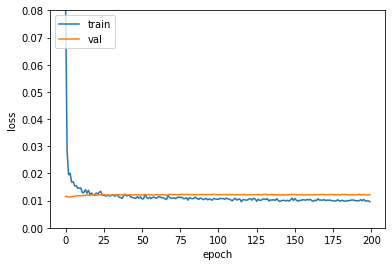

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.08)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
model_S = Sequential()
model_S.add(LSTM(32, input_shape=(None, 1)))
model_S.add(Dropout(0.3))
model_S.add(Dense(1))

model_S.compile(loss='mean_squared_error', optimizer='adam')

hist_S = model_S.fit(x_train_S, y_train_S, epochs=200, batch_size=32, validation_data=(x_val_S, y_val_S))

Train on 560 samples, validate on 210 samples
Epoch 1/200
560/560 [==============================] - 3s 6ms/sample - loss: 0.0357 - val_loss: 0.0049
Epoch 2/200
560/560 [==============================] - 0s 851us/sample - loss: 0.0119 - val_loss: 0.0027
Epoch 3/200
560/560 [==============================] - 0s 817us/sample - loss: 0.0097 - val_loss: 0.0028
Epoch 4/200
560/560 [==============================] - 0s 805us/sample - loss: 0.0092 - val_loss: 0.0026
Epoch 5/200
560/560 [==============================] - 0s 807us/sample - loss: 0.0075 - val_loss: 0.0027
Epoch 6/200
560/560 [==============================] - 0s 828us/sample - loss: 0.0077 - val_loss: 0.0026
Epoch 7/200
560/560 [==============================] - 0s 794us/sample - loss: 0.0074 - val_loss: 0.0026
Epoch 8/200
560/560 [==============================] - 0s 800us/sample - loss: 0.0064 - val_loss: 0.0026
Epoch 9/200
560/560 [==============================] - 0s 810us/sample - loss: 0.0053 - val_loss: 0.0027
Epoch 10/20

Epoch 78/200
560/560 [==============================] - 0s 785us/sample - loss: 0.0033 - val_loss: 0.0022
Epoch 79/200
560/560 [==============================] - 0s 796us/sample - loss: 0.0031 - val_loss: 0.0022
Epoch 80/200
560/560 [==============================] - 0s 784us/sample - loss: 0.0027 - val_loss: 0.0021
Epoch 81/200
560/560 [==============================] - 0s 787us/sample - loss: 0.0027 - val_loss: 0.0022
Epoch 82/200
560/560 [==============================] - 0s 782us/sample - loss: 0.0026 - val_loss: 0.0021
Epoch 83/200
560/560 [==============================] - 0s 796us/sample - loss: 0.0026 - val_loss: 0.0021
Epoch 84/200
560/560 [==============================] - 0s 801us/sample - loss: 0.0030 - val_loss: 0.0021
Epoch 85/200
560/560 [==============================] - 0s 785us/sample - loss: 0.0029 - val_loss: 0.0021
Epoch 86/200
560/560 [==============================] - 0s 794us/sample - loss: 0.0026 - val_loss: 0.0021
Epoch 87/200
560/560 [========================

Epoch 155/200
560/560 [==============================] - 0s 796us/sample - loss: 0.0020 - val_loss: 0.0019
Epoch 156/200
560/560 [==============================] - 0s 789us/sample - loss: 0.0023 - val_loss: 0.0019
Epoch 157/200
560/560 [==============================] - 0s 805us/sample - loss: 0.0021 - val_loss: 0.0018
Epoch 158/200
560/560 [==============================] - 0s 814us/sample - loss: 0.0020 - val_loss: 0.0018
Epoch 159/200
560/560 [==============================] - 0s 803us/sample - loss: 0.0023 - val_loss: 0.0018
Epoch 160/200
560/560 [==============================] - 0s 789us/sample - loss: 0.0019 - val_loss: 0.0018
Epoch 161/200
560/560 [==============================] - 0s 814us/sample - loss: 0.0023 - val_loss: 0.0019
Epoch 162/200
560/560 [==============================] - 0s 810us/sample - loss: 0.0020 - val_loss: 0.0019
Epoch 163/200
560/560 [==============================] - 0s 803us/sample - loss: 0.0021 - val_loss: 0.0018
Epoch 164/200
560/560 [==============

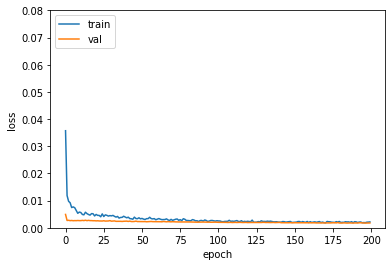

In [30]:
plt.plot(hist_S.history['loss'])
plt.plot(hist_S.history['val_loss'])
plt.ylim(0.0, 0.08)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
model_M = Sequential()
model_M.add(LSTM(32, input_shape=(None, 1)))
model_M.add(Dropout(0.3))
model_M.add(Dense(1))

model_M.compile(loss='mean_squared_error', optimizer='adam')

hist_M = model_M.fit(x_train_M, y_train_M, epochs=200, batch_size=32, validation_data=(x_val_M, y_val_M))

Train on 560 samples, validate on 210 samples
Epoch 1/200
560/560 [==============================] - 3s 6ms/sample - loss: 0.0634 - val_loss: 0.0085
Epoch 2/200
560/560 [==============================] - 0s 787us/sample - loss: 0.0215 - val_loss: 0.0036
Epoch 3/200
560/560 [==============================] - 0s 794us/sample - loss: 0.0159 - val_loss: 0.0036
Epoch 4/200
560/560 [==============================] - 0s 807us/sample - loss: 0.0123 - val_loss: 0.0034
Epoch 5/200
560/560 [==============================] - 0s 803us/sample - loss: 0.0118 - val_loss: 0.0034
Epoch 6/200
560/560 [==============================] - 0s 801us/sample - loss: 0.0109 - val_loss: 0.0036
Epoch 7/200
560/560 [==============================] - 0s 794us/sample - loss: 0.0109 - val_loss: 0.0034
Epoch 8/200
560/560 [==============================] - 0s 812us/sample - loss: 0.0102 - val_loss: 0.0035
Epoch 9/200
560/560 [==============================] - 0s 825us/sample - loss: 0.0091 - val_loss: 0.0035
Epoch 10/20

Epoch 78/200
560/560 [==============================] - 0s 880us/sample - loss: 0.0030 - val_loss: 0.0020
Epoch 79/200
560/560 [==============================] - 0s 862us/sample - loss: 0.0029 - val_loss: 0.0020
Epoch 80/200
560/560 [==============================] - 0s 860us/sample - loss: 0.0034 - val_loss: 0.0020
Epoch 81/200
560/560 [==============================] - 0s 823us/sample - loss: 0.0028 - val_loss: 0.0019
Epoch 82/200
560/560 [==============================] - 0s 814us/sample - loss: 0.0026 - val_loss: 0.0019
Epoch 83/200
560/560 [==============================] - 0s 839us/sample - loss: 0.0029 - val_loss: 0.0019
Epoch 84/200
560/560 [==============================] - 0s 814us/sample - loss: 0.0031 - val_loss: 0.0019
Epoch 85/200
560/560 [==============================] - 0s 821us/sample - loss: 0.0027 - val_loss: 0.0019
Epoch 86/200
560/560 [==============================] - 0s 805us/sample - loss: 0.0029 - val_loss: 0.0019
Epoch 87/200
560/560 [========================

Epoch 155/200
560/560 [==============================] - 0s 862us/sample - loss: 0.0017 - val_loss: 0.0012
Epoch 156/200
560/560 [==============================] - 0s 846us/sample - loss: 0.0019 - val_loss: 0.0012
Epoch 157/200
560/560 [==============================] - 0s 883us/sample - loss: 0.0016 - val_loss: 0.0012
Epoch 158/200
560/560 [==============================] - 0s 817us/sample - loss: 0.0017 - val_loss: 0.0012
Epoch 159/200
560/560 [==============================] - 0s 848us/sample - loss: 0.0018 - val_loss: 0.0013
Epoch 160/200
560/560 [==============================] - 0s 873us/sample - loss: 0.0016 - val_loss: 0.0012
Epoch 161/200
560/560 [==============================] - 0s 805us/sample - loss: 0.0018 - val_loss: 0.0012
Epoch 162/200
560/560 [==============================] - 0s 890us/sample - loss: 0.0016 - val_loss: 0.0012
Epoch 163/200
560/560 [==============================] - 0s 878us/sample - loss: 0.0017 - val_loss: 0.0011
Epoch 164/200
560/560 [==============

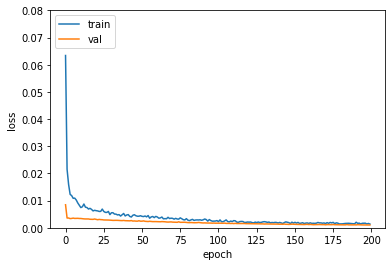

In [32]:
plt.plot(hist_M.history['loss'])
plt.plot(hist_M.history['val_loss'])
plt.ylim(0.0, 0.08)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [33]:
trainScore = model_L.evaluate(x_train_L, y_train_L, verbose=0)
model_L.reset_states()
valScore = model_L.evaluate(x_val_L, y_val_L, verbose=0)
model_L.reset_states()
testScore = model_L.evaluate(x_test_L, y_test_L, verbose=0)
model_L.reset_states()
print('Train Score(Active Power): ', trainScore)
print('Validataion Score(Active Power): ', valScore)
print('Test Score(Active Power): ', testScore)

Train Score(Active Power):  0.009586787303643568
Validataion Score(Active Power):  0.012322238823842434
Test Score(Active Power):  0.011917985449342625


In [34]:
trainScore = model_S.evaluate(x_train_S, y_train_S, verbose=0)
model_S.reset_states()
valScore = model_S.evaluate(x_val_S, y_val_S, verbose=0)
model_S.reset_states()
testScore = model_S.evaluate(x_test_S, y_test_S, verbose=0)
model_S.reset_states()
print('Train Score(Exponential a=0.3): ', trainScore)
print('Validataion Score(Exponential a=0.3): ', valScore)
print('Test ScoreExponential a=0.3): ', testScore)

Train Score(Exponential a=0.3):  0.0014459024649113416
Validataion Score(Exponential a=0.3):  0.001778862891452653
Test ScoreExponential a=0.3):  0.0017386333126088848


In [35]:
trainScore = model_M.evaluate(x_train_M, y_train_M, verbose=0)
model_M.reset_states()
valScore = model_M.evaluate(x_val_M, y_val_M, verbose=0)
model_M.reset_states()
testScore = model_M.evaluate(x_test_M, y_test_M, verbose=0)
model_M.reset_states()
print('Train Score(Moving Average): ', trainScore)
print('Validataion Score(Moving Average): ', valScore)
print('Test Score(Moving Average): ', testScore)

Train Score(Moving Average):  0.000998085639106908
Validataion Score(Moving Average):  0.001027976856788709
Test Score(Moving Average):  nan


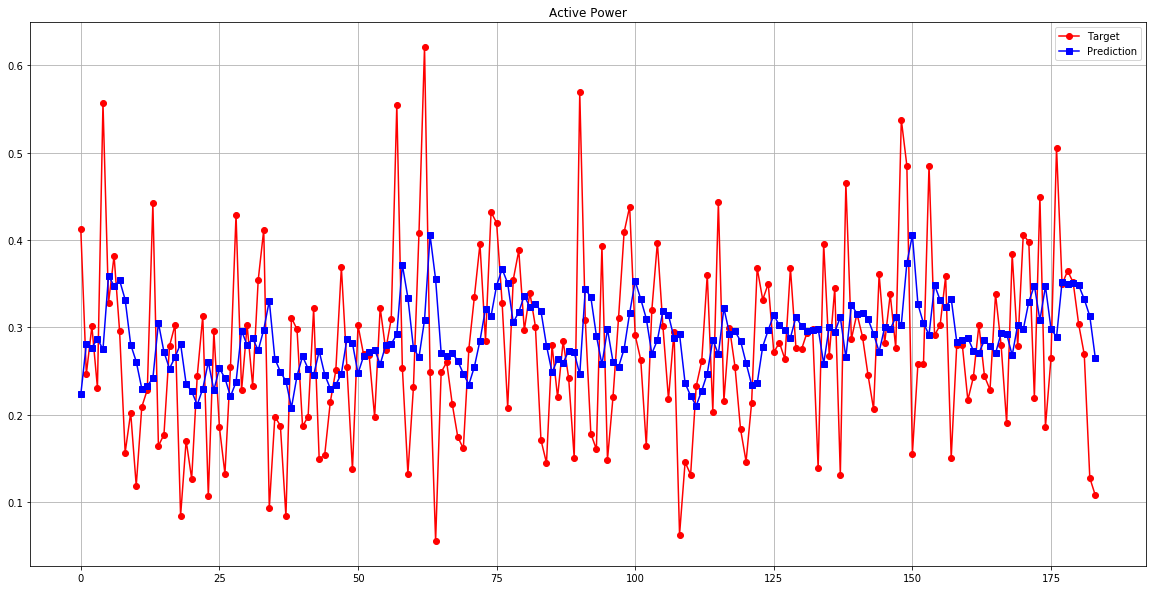

In [37]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(y_test_L[:], 'ro-', label="Target")
plt.plot(model_L.predict(x_test_L[:, :, :]), 'bs-', label="Prediction")
plt.legend()
plt.title("Active Power")
plt.show()

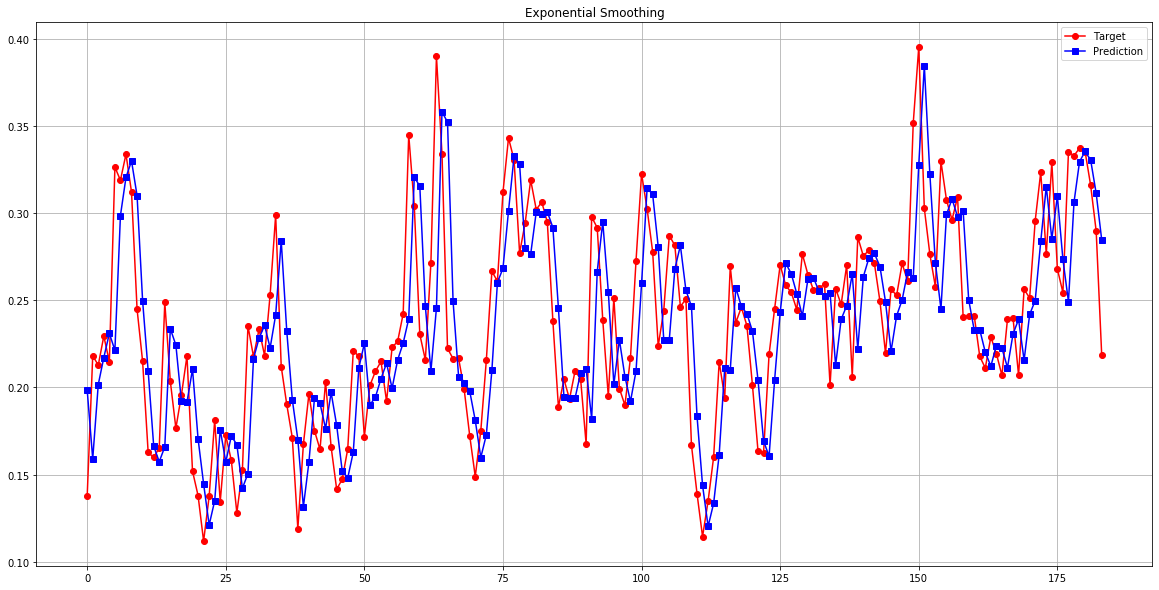

In [38]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(y_test_S[:], 'ro-', label="Target")
plt.plot(model_S.predict(x_test_S[:, :, :]), 'bs-', label="Prediction")
plt.legend()
plt.title("Exponential Smoothing")
plt.show()

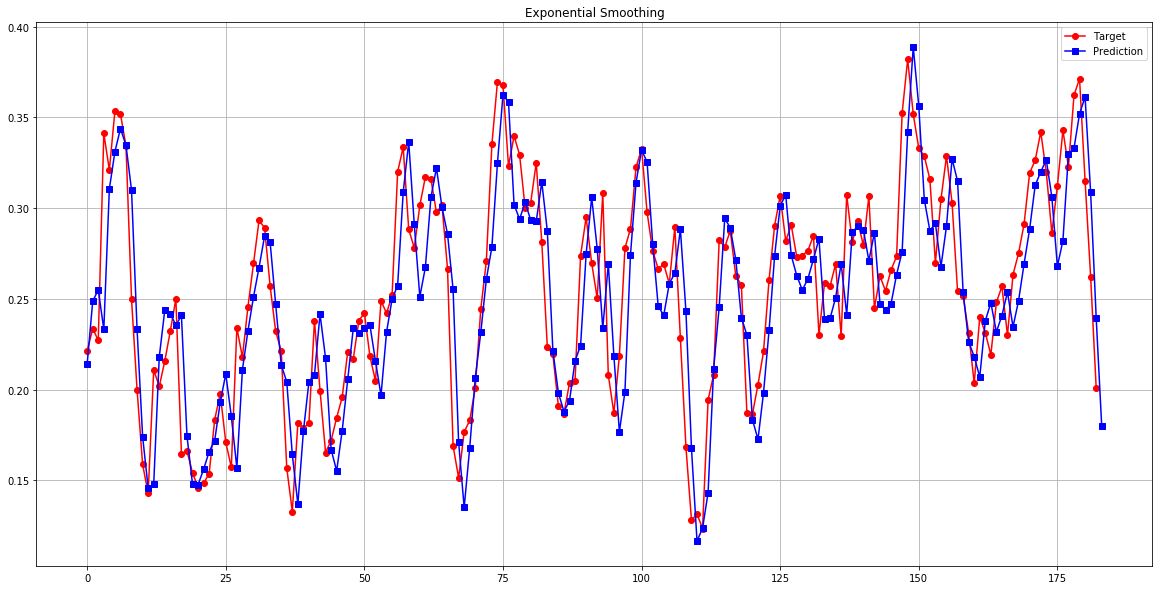

In [39]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(y_test_M[:], 'ro-', label="Target")
plt.plot(model_M.predict(x_test_M[:, :, :]), 'bs-', label="Prediction")
plt.legend()
plt.title("Moving Average")
plt.show()